# Exercise 5.1: The Volumes of Hyperspheres

An $n$-dimensional sphere ($n$-sphere), also known as an $n$-ball, is the region of space comprising all points within a fixed distance, called the radius, from a given point. 

In this example we wish to calculate the volume of an $n$-ball with unit radius, centered at the origin, for various values of $n$. 

For $n=0$ dimensions, the volume is defined to be $V_0 = 1$. Ine one dimension, the volume is simply $V_1 = 2$. 

To calculate the volumes in higher dimensions, we will use the Monte Carlo integration technique, generalizing the formula we used to obtain an approximation to $\pi$: 


$V_n = \int \mathrm{d}^n x ~\theta(1 - \sum_{i=1}^n x_i^2)$,

so for example, the volume of a 2-ball (a circle) is simply:

$V_2 = 4 \int_{0}^1 \mathrm{d} x_1 \int_{0}^1 \mathrm{d} x_2  ~\theta(1 - x_1^2 - x_2^2)$.

We expect this to be = $\pi$! The procedure to obtain this result was examined in Example 5.4. We will generalize this to $n$ dimensions. 

(a) Start by calculating the volume of an $3$-dimensional sphere, for which we expect the result $V_3 = \frac{4}{3} \pi$: 

$V_2 = 2^3 \int_{0}^1 \mathrm{d} x_1 \int_{0}^1 \mathrm{d} x_2 \int_{0}^1 \mathrm{d} x_3  ~\theta(1 - x_1^2 - x_2^2 - x_3^2)$.


(b) Generalize your code to handle any number of dimensions, and calculate the volumes of $n$-balls up to $n=30$ using:

$V_n = 2^n \int_{0}^1 \mathrm{d} x_1 \int_{0}^1 \mathrm{d} x_2 \int_{0}^1 ... \mathrm{d} x_n ~\theta(1 - \sum_{i=1}^n x_i^2)$. 

(c) Graph the result. 

BONUS 10%:

(d) Add the analytical results to your graph, given for the unit sphere, by:

$V_n = \frac{\pi^{n/2}}{\Gamma(\frac{n}{2}+1)}$, where $\Gamma$ is the Euler Gamma function. 

You may use the scipy special function: 

```scipy.special.gamma``` which represents the $\Gamma$ function. 

Solution:

(a) Let's start by extending Example 5.4 to handle three-dimensional spheres. This is trivially obtained by adding an extra dimension to the calculation. 

In [16]:
import math
import numpy as np
import random

# The number of points to use:
N=1E6

def mcint_3D(func,limitsx,limitsy,limitsz, N):
    """Calculates the three-dimensional Monte Carlo integral of func in limitsx=[a_x,b_x] and limitsy=[a_y,b_y], limitsz=[a_z, b_z], for N points"""
    sumf = 0 # we will use this variable for the sum of f(x_i)
    sumfsq = 0 # and this one for the sum of f(x_i)^2, used in the error calculation
    for i in range(int(N)):
        xi = (limitsx[1]-limitsx[0]) * random.random() + limitsx[0]
        yi = (limitsy[1]-limitsy[0]) * random.random() + limitsy[0]
        zi = (limitsz[1]-limitsz[0]) * random.random() + limitsz[0]
        #print(xi,yi,zi)
        sumf = sumf + func(xi,yi,zi)
        sumfsq = sumfsq + func(xi,yi,zi)**2 
    # now calculate the average value of f (i.e. the integral):
    I = sumf/N
    # and the error: 
    sigmaIsq = (1/N) * ( (1/N) * sumfsq - I**2 ) # this is the variance (i.e. the error squared)
    sigmaI = math.sqrt(sigmaIsq) # this is the actual error
    return I, sigmaI # return the integral and its error 

# now define the function to be integrated as the theta function: 
def f(x,y,z):
    if x**2 + y**2 + z**2 > 1: # outside the sphere
        return 0
    else:
        return 1 # inside the sphere


# let's first calculate the integral:
Int_3D, Err_3D = mcint_3D(f,[0,1],[0,1], [0,1],N) # this way you can access both the integral and its error

# print: 
print("V_3 estimate for N=", N, 'is', 8*Int_3D, '+-', 8*Err_3D)
print("Compared to the expected value=", 4/3 * math.pi)

V_3 estimate for N= 1000000.0 is 4.194312 +- 0.0039952775681616915
Compared to the expected value= 4.1887902047863905


(b) Now let's generalize the integration formula to $n$ dimensions!

In [34]:
def MCVolume_nBall(n,N): 
    """Calculates the volume of an n-ball -- a sphere in n-dimensions, using Monte Carlo integration"""
    # each time we go through the loop, we create a list of random numbers of length n
    sumf = 0 # we will use this variable for the sum of f(x_i)
    for i in range(int(N)):
        sumxisq = 0
        for j in range(int(n)):
            sumxisq = sumxisq + random.random()**2
        # at this point sumxisq is the sum of the squares of random numbers
        # to implement the theta function we sum over the list and square:
        if sumxisq < 1:
            sumf = sumf + 1
    # now calculate the average value of f (i.e. the integral):
    I = sumf/N    
    sigmaIsq = (1/N) * ( (1/N) * sumf - I**2 ) # this is the variance (i.e. the error squared)
    sigmaI = math.sqrt(sigmaIsq) # this is the actual error
    # the volume is actually 2^n times the integral: 
    Volume = 2**n * I
    Error = 2**n * sigmaI
    return Volume, Error    

# Let's test it for n=1,2,3:
V1, errV1 = MCVolume_nBall(1,1E6)
print("V1=",V1,"+-",errV1)
V2, errV2 = MCVolume_nBall(2,1E6)
print("V3=",V2,"+-",errV2)
V3, errV3 = MCVolume_nBall(3,1E6)
print("V3=",V3,"+-",errV3)

V1= 2.0 +- 0.0
V3= 3.141808 +- 0.0016420336449464116
V3= 4.184872 +- 0.003995725509042881


(c) It works! Now let's see do this for n=1 to n=30 and make a graph!

In [53]:
from tqdm import tqdm

# the number of dimensions
narray = np.linspace(1,30,30)

# the number of points to integrate over:
N = 1E6

# perform the calculations
Vnarray = []
Errnarray = []
for n in tqdm(narray):
    Vn, errVn = MCVolume_nBall(n,N)
    Vnarray.append(Vn) # append to the array
    Errnarray.append(errVn) # also append the error

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:31<00:00,  1.04s/it]


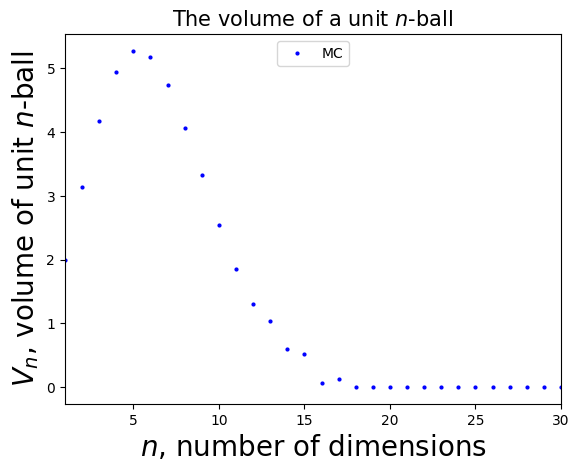

In [52]:
# and now plot!
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$n$, number of dimensions', fontsize=20) # set the x label
ax.set_ylabel(r'$V_n$, volume of unit $n$-ball', fontsize=20) # set the y label
ax.set_title('The volume of a unit $n$-ball', fontsize=15) # set the title 

# set the x and y limits:
ax.set_xlim(1, 30)

# plot with error bars:
ax.plot(narray, Vnarray, color='blue', linestyle='-', lw=0, marker='o', ms=2, label="MC") 

# construct the legend:
ax.legend(loc='upper center')  # Add a legend

plt.show() # show the plot here

We can observe that the volume of the unit $n$-ball increases until $n=4$ and then decreases, dropping to almost zero at around $n\sim 15-20$!

(d) Now let's calculate the analytical result using ```scipy.special.gamma``` and the formula given above and plot it along with the MC results:

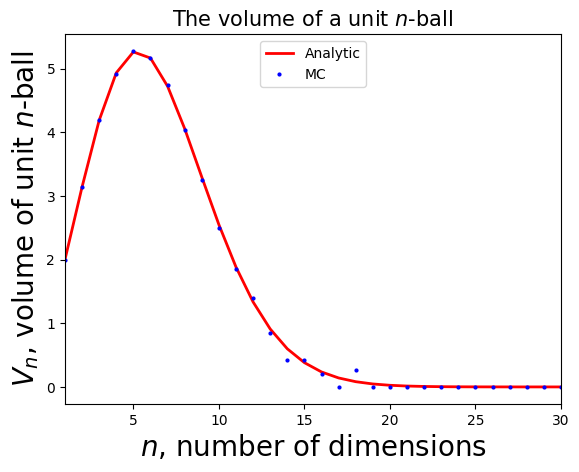

In [60]:
import scipy
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

# get the analytic result: 
VnAnalytic = [scipy.pi**(n/2)/scipy.special.gamma(n/2+1) for n in range(1,31)]

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$n$, number of dimensions', fontsize=20) # set the x label
ax.set_ylabel(r'$V_n$, volume of unit $n$-ball', fontsize=20) # set the y label
ax.set_title('The volume of a unit $n$-ball', fontsize=15) # set the title 

# set the x and y limits:
ax.set_xlim(1, 30)

# plot analytic result: 
ax.plot(narray, VnAnalytic, color='red', linestyle='-', lw=2, label="Analytic") 

# plot MC result:
ax.plot(narray, Vnarray, color='blue', lw=0, marker='o', ms=2, label="MC") 

# construct the legend:
ax.legend(loc='upper center')  # Add a legend

plt.show() # show the plot here
